## Network analysis 101

### This is an example notebook to show you the basics of working with graphs in python (no exercises).


******************
$\textit{Authors:}$ Nikolaj Krebs \& Simon Guldager \
$\textit{Date:}$ 22-09-2024

In [ ]:
# Installing packages (this can be done also via anaconda)
import sys


!pip install  igraph
from igraph import *

#### 1. Creating a graph (toy example)

In [24]:
# Create a directed graph
g = Graph(directed=True)

# Add 5 vertices
g.add_vertices(5)

# Add ids and labels to vertices
for i in range(len(g.vs)):
    g.vs[i]["id"]= i
    g.vs[i]["label"]= str(i)

# Add edges
g.add_edges([(0,2),(0,1),(0,3),(1,2),(1,3),(2,4),(3,4)])

# Add weights and edge labels, these could also be assigned individually
weights = [8,6,3,5,6,4,9]
g.es['weight'] = weights
g.es['label'] = weights

#### 2. Visualising the graph

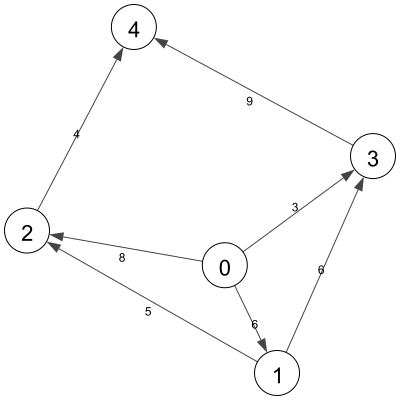

In [25]:
visual_style = {}

out_name = "graph.png"

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 27

# Set vertex colours
visual_style["vertex_color"] = 'white'

# Set vertex size
visual_style["vertex_size"] = 45

# Set vertex lable size
visual_style["vertex_label_size"] = 22

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout('fr')
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_name, **visual_style)

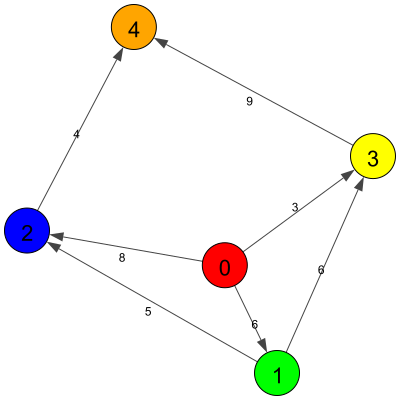

In [26]:
visual_style = {}

out_name = "graph_coloured.png"

# Set bbox and margin
visual_style["bbox"] = (400,400)
visual_style["margin"] = 27

# Set vertex colours
g.vs["color"] = ["red", "green", "blue", "yellow", "orange"]

# Set vertex size
visual_style["vertex_size"] = 45

# Set vertex lable size
visual_style["vertex_label_size"] = 22

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
visual_style["layout"] = my_layout

# Plot the graph
plot(g, out_name, **visual_style)

#### 3. Obtaining information on vertices and edges of the graph

In [27]:
print("Number of vertices in the graph:", g.vcount())
print("Number of edges in the graph", g.ecount())
print("Density of the graph:", g.ecount()/(g.vcount()*(g.vcount()-1)))
print("Is the graph directed:", g.is_directed())
print("Maximum degree in the graph:", g.maxdegree())
print("Adjacency matrix:\n", g.get_adjacency())

Number of vertices in the graph: 5
Number of edges in the graph 7
Density of the graph: 0.35
Is the graph directed: True
Maximum degree in the graph: 3
Adjacency matrix:
 [[0, 1, 1, 1, 0]
 [0, 0, 1, 1, 0]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0]]


.. extract vertex degrees

In [28]:
degrees = []
total = 0

for n in range(g.vcount()):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))

print("Average degree:", total/g.vcount())
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)));

Average degree: 2.8
Maximum degree: 3
Vertex ID with the maximum degree: 0


In [29]:
print(g.neighbors.__doc__)
print(g.neighbors(0, mode=ALL))

Returns adjacent vertices to a given vertex.

@param vertex: a vertex ID
@param mode: whether to return only successors (C{"out"}),
  predecessors (C{"in"}) or both (C{"all"}). Ignored for undirected
  graphs.
[1, 2, 3]


#### 4. Breadth-first search (BFS) from a vertex

In [30]:
print(g.bfs.__doc__)
print(g.bfs(0))

Conducts a breadth first search (BFS) on the graph.

@param vid: the root vertex ID
@param mode: either C{"in"} or C{"out"} or C{"all"}, ignored
  for undirected graphs.
@return: a tuple with the following items:
   - The vertex IDs visited (in order)
   - The start indices of the layers in the vertex list
   - The parent of every vertex in the BFS

([0, 1, 2, 3, 4], [0, 1, 4, 5], [-1, 0, 0, 0, 2])


#### 5. Determine the maximum flow between the source and target vertices

In [31]:
print(g.maxflow.__doc__)
print(g.maxflow(0,4,weights).__doc__)

maxflow = g.maxflow(0,4,weights)

print("The maximum flow value:", maxflow.value)
print("The flow values on each edge:", maxflow.flow)
print("Tedge IDs in the minimal cut of the flow:", maxflow.cut)
print("The vertex IDs in the parts created created by the cut:", maxflow.partition)

Returns a maximum flow between the given source and target vertices
    in a graph.

    A maximum flow from I{source} to I{target} is an assignment of
    non-negative real numbers to the edges of the graph, satisfying
    two properties:

        1. For each edge, the flow (i.e. the assigned number) is not
           more than the capacity of the edge (see the I{capacity}
           argument)

        2. For every vertex except the source and the target, the
           incoming flow is the same as the outgoing flow.

    The value of the flow is the incoming flow of the target or the
    outgoing flow of the source (which are equal). The maximum flow
    is the maximum possible such value.

    @param capacity: the edge capacities (weights). If C{None}, all
      edges have equal weight. May also be an attribute name.
    @return: a L{Flow} object describing the maximum flow
    
A flow of a given graph.

    This is a simple class used to represent flows returned by
    L{Graph.maxf

#### 6. Determining shortest paths from a vertex

In [32]:
print ("---------------------------------")
print(g.get_shortest_paths.__doc__)
print("---------------------------------\n")

print("The shortest paths from vertex 0:", g.get_shortest_paths(0))
print("The shortest paths from vertex 0 to vertex 4:", g.get_shortest_paths(0, to=4))

---------------------------------
Calculates the shortest paths from/to a given node in a graph.

@param v: the source/destination for the calculated paths
@param to: a vertex selector describing the destination/source for
  the calculated paths. This can be a single vertex ID, a list of
  vertex IDs, a single vertex name, a list of vertex names or a
  L{VertexSeq} object. C{None} means all the vertices.
@param weights: edge weights in a list or the name of an edge attribute
  holding edge weights. If C{None}, all edges are assumed to have
  equal weight.
@param mode: the directionality of the paths. C{"in"} means to
  calculate incoming paths, C{"out"} means to calculate outgoing
  paths, C{"all"} means to calculate both ones.
@param output: determines what should be returned. If this is
  C{"vpath"}, a list of vertex IDs will be returned, one path
  for each target vertex. For unconnected graphs, some of the list
  elements may be empty. Note that in case of mode=C{"in"}, the vertice

#### 7. Estimate betweeness

In [33]:
print(g.betweenness.__doc__)
g.betweenness(vertices=None, directed=True, weights=g.es['weight'])

Calculates or estimates the betweenness of vertices in a graph.

Also supports calculating betweenness with shortest path length cutoffs or
considering shortest paths only from certain source vertices or to certain
target vertices.

Keyword arguments:
@param vertices: the vertices for which the betweennesses must be returned.
  If C{None}, assumes all of the vertices in the graph.
@param directed: whether to consider directed paths.
@param cutoff: if it is an integer, only paths less than or equal to this
  length are considered, effectively resulting in an estimation of the
  betweenness for the given vertices. If C{None}, the exact betweenness is
  returned.
@param weights: edge weights to be used. Can be a sequence or iterable or
  even an edge attribute name.
@param sources: the set of source vertices to consider when calculating
  shortest paths.
@param targets: the set of target vertices to consider when calculating
  shortest paths.
@return: the (possibly cutoff-limited) between

[0.0, 0.0, 1.5, 0.5, 0.0]